In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

In [30]:
data = pd.read_excel("cleardata.xlsx")
display(data)

,p (uSv/h),Tâm (m),R1,Center (m),R1 (uSv/h),Trái,R2,Left (m),R2 (uSv/h),Phải,R2.1,Right (m),R3 (uSv/h)
0,0.173,0.1,1100.000,0.1,1100.0000,0.0,7.266,0.0,6.9310,0.0,6.309,0.0,6.4310
1,0.143,0.2,447.700,0.2,447.7000,0.0,6.596,0.1,14.2000,0.0,6.553,0.1,14.5700
2,0.077,0.3,160.600,0.3,162.2000,0.1,14.280,0.2,21.5750,0.1,13.350,0.2,23.9050
3,0.131,0.3,163.800,0.4,73.6150,0.1,14.120,0.3,25.8300,0.1,15.790,0.3,25.7000
4,0.113,0.4,73.810,0.5,37.7300,0.2,21.790,0.4,20.5250,0.2,24.070,0.4,20.7400
5,NaN,0.4,73.420,0.6,21.1700,0.2,21.360,0.5,15.5900,0.2,23.740,0.5,14.5100
6,NaN,0.5,38.200,0.7,12.2000,0.3,26.480,0.6,11.3400,0.3,26.040,0.6,10.9300
7,NaN,0.5,37.260,0.8,8.0975,0.3,25.180,0.7,8.0460,0.3,25.360,0.7,8.3875
8,NaN,0.6,21.290,1.0,4.3800,0.4,20.620,0.8,5.9135,0.4,19.570,0.8,5.9860
9,NaN,0.6,21.050,1.5,1.2010,0.4,20.430,1.0,3.4590,0.4,21.910,1.0,3.8665


R2c = 0.887
Center = -3.9005x  6.0207
R2 = 0.9868
Left = -2.4166x  3.8486
R2 = 0.995
Right = -2.5404x  3.9234


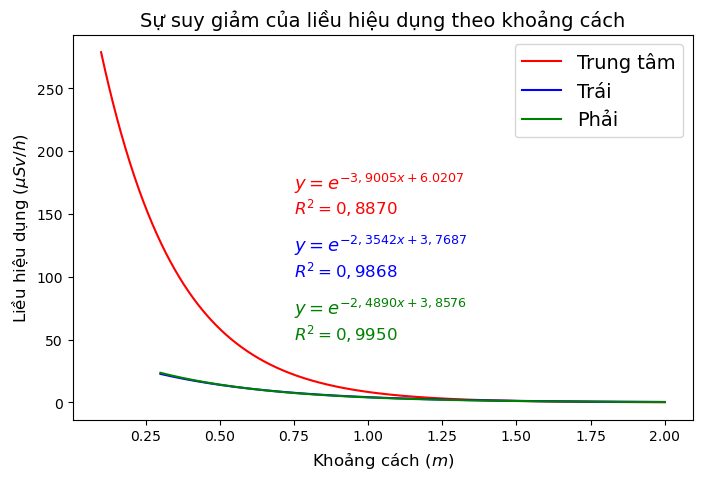

In [142]:
plt.figure(figsize=(8,5))

# DrawPlot in log scale

def R2(x, y):
    fit = np.polyfit(x, y, 1)
    yf = fit[0]*x + fit[1]
    result = 1 - (sum((y-yf)**2)) / (sum((y-np.mean(y))**2))
    return round(result, 4)

def yfit(x, y, xsm):
    f = np.polyfit(x, y, 1)
    return f[0]*xsm + f[1]

def yfit_pr(x, y, xsm):
    f = np.polyfit(x, y, 1)
    return f[0], f[1]

# Background

B = np.mean(data["p (uSv/h)"][0:5])

#Center

x_c = data["Center (m)"][0:11]   # Choise in 0.2 m 

y_c = data["R1 (uSv/h)"][0:11] - B

x_cs = np.linspace(min(x_c), max(x_c), 1000)

yf_c = yfit(x_c, np.log(y_c), x_cs)

R2c = R2(x_c, np.log(y_c))

print("R2c = " + str(round(R2c,4)))

ac , bc = yfit_pr(x_c, np.log(y_c), x_cs)

print("Center = " + str(round(ac, 4)) + "x  " + str(round(bc,4)))

plt.plot(x_cs, np.exp(yf_c), color='red', label='Trung tâm')

# left

x_l = data["Left (m)"][3:12]   # Choise in 0.3 m 

y_l = data["R2 (uSv/h)"][3:12] - B

x_ls = np.linspace(min(x_l), max(x_l), 1000)

yf_l = yfit(x_l, np.log(y_l), x_ls)

R2l = R2(x_l, np.log(y_l))

print("R2 = " + str(round(R2l,4)))

al , bl = yfit_pr(x_l, np.log(y_l), x_ls)

print("Left = " + str(round(al, 4)) + "x  " + str(round(bl,4)))

plt.plot(x_ls, np.exp(yf_l), color='blue', label='Trái')

# Right

x_r = data["Right (m)"][3:12]   # Choise in 0.3 m 

y_r = data["R3 (uSv/h)"][3:12] - B

x_rs = np.linspace(min(x_r), max(x_r), 1000)

yf_r = yfit(x_r, np.log(y_r), x_rs)

R2r = R2(x_r, np.log(y_r))

print("R2 = " + str(round(R2r,4)))

plt.plot(x_rs, np.exp(yf_r), color='green', label='Phải')

ar , br = yfit_pr(x_r, np.log(y_r), x_rs)

print("Right = " + str(round(ar, 4)) + "x  " + str(round(br,4)))

#
plt.title("Sự suy giảm của liều hiệu dụng theo khoảng cách", size=14)
plt.xlabel(r"Khoảng cách $(m)$", size=12)
plt.ylabel(r"Liều hiệu dụng $(\mu Sv/h)$", size=12)
plt.legend(fontsize=14)

plt.text(0.55+0.2, 20+150, r"$y = e^{-3,9005x + 6.0207}$", c='red', size=13)
plt.text(0.55+0.2, 20+150-20, r"$R^2 = 0,8870$", c='red', size=12)

plt.text(0.55+0.2, 20+150 - 50, r"$y = e^{-2,3542x + 3,7687}$", c='blue', size=13)
plt.text(0.55+0.2, 20+150 - 50 - 20, r"$R^2 = 0,9868$", c='blue', size=12)

plt.text(0.55+0.2, 20+150 - 100, r"$y = e^{-2,4890x + 3,8576}$", c='green', size=13)
plt.text(0.55+0.2, 20+150 - 100 - 20, r"$R^2 = 0,9950$", c='green', size=12)

#plt.savefig("ttb9.png", dpi=300)

In [143]:
def a(x, y):
    return np.exp( (2*sum(np.log(x)) + sum(np.log(y)))/len(x) )

def Rtwo(x, y):
    yf = (np.exp( (sum(2*np.log(x)) + sum(np.log(y)))/len(x) ))/x**2
    ans = 1 - (sum((y-yf)**2)) / (sum((y-np.mean(y))**2))
    return round(ans, 4)

0.7737
0.8441
0.865


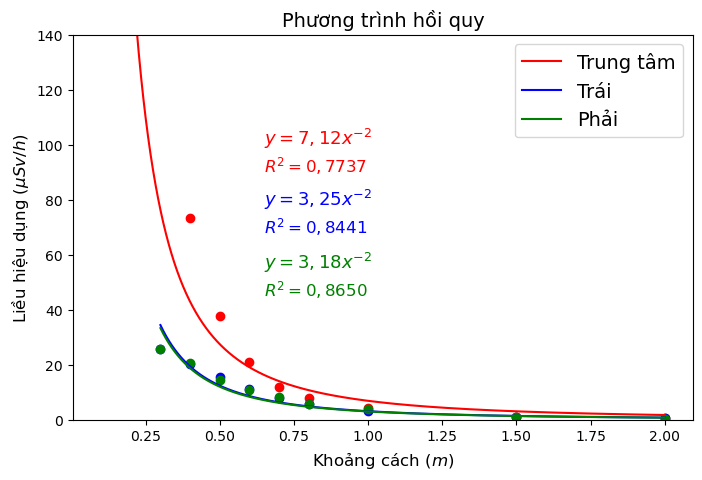

In [145]:
plt.figure(figsize=(8,5))

## CENTER
x_cs2 = np.linspace(min(x_c), max(x_c), 10000)
y_c2 = a(x_c, y_c)/x_cs2**2
plt.plot(x_cs2, y_c2, color ='r', label="Trung tâm")
plt.scatter(x_c, y_c, c='r')
print(Rtwo(x_c, y_c))
## CENTER

## LEFT
x_ls2 = np.linspace(min(x_l), max(x_l), 10000)
y_l2 = a(x_l, y_l)/x_ls2**2
plt.plot(x_ls2, y_l2, color ='b', label="Trái")
plt.scatter(x_l, y_l, c='b')
print(Rtwo(x_l, y_l))
## LEFT

## RIGHT
x_rs2 = np.linspace(min(x_r), max(x_r), 10000)
y_r2 = a(x_r, y_r)/x_rs2**2
plt.plot(x_rs2, y_r2, color ='g', label="Phải")
plt.scatter(x_r, y_r, c='g')
print(Rtwo(x_r, y_r))
## RIGHT
plt.ylim(0, 140)

plt.title("Phương trình hồi quy", size=14)
plt.xlabel(r"Khoảng cách $(m)$", size=12)
plt.ylabel(r"Liều hiệu dụng $(\mu Sv/h)$", size=12)
plt.legend(fontsize=14)

plt.text(0.55+0.1, 100, r"$y = 7,12x^{-2} $", c='red', size=13)
plt.text(0.55+0.1, 100-10, r"$R^2 = 0,7737$", c='red', size=12)

plt.text(0.55+0.1, 100 - 22, r"$y = 3,25x^{-2}$", c='blue', size=13)
plt.text(0.55+0.1, 100 - 22 - 10, r"$R^2 = 0,8441$", c='blue', size=12)

plt.text(0.55+0.1, 100 - 45, r"$y = 3,18x^{-2}$", c='green', size=13)
plt.text(0.55+0.1, 100 - 45 - 10, r"$R^2 = 0,8650$", c='green', size=12)

#plt.savefig("ttb9_b7.png", dpi=300)